# Modeling and Simulation in Python

Project 1 example

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [2]:
from pandas import read_html

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [3]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

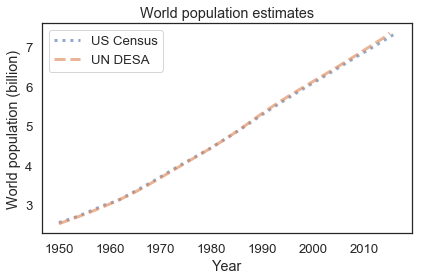

In [4]:
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
plot_results(census, un, empty, 'World population estimates')

In [5]:
half = get_first_value(census) / 2

1.278814327

In [6]:
init = State(young=half, old=half)

,values
young,1.278814
old,1.278814


In [120]:
system = System(birth_rate1 = 1/20,
                mature_rate = 1/55,
                death_rate = 1/20,
                t_0 = 1950,
                t_end = 2016,
                init=init)

,values
birth_rate1,0.05
mature_rate,0.0181818
death_rate,0.05
t_0,1950
t_end,2016
init,young 1.278814 old 1.278814 dtype: flo...


In [121]:
def update_func1(state, t, system):
    births = system.birth_rate1 * state.young
        
    maturings = system.mature_rate * state.young
    deaths = system.death_rate * state.old
    
    young = state.young + births - maturings
    old = state.old + maturings - deaths
    
    return State(young=young, old=old)

In [122]:
state = update_func1(init, system.t_0, system)

,values
young,1.319504
old,1.238125


In [123]:
state = update_func1(state, system.t_0, system)

,values
young,1.361488
old,1.200210


In [124]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.young + state.old
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.young + state.old
        
    return results

In [125]:
results = run_simulation(system, update_func1);

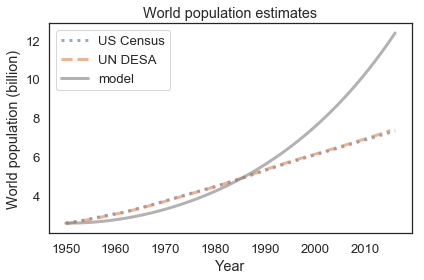

In [126]:
plot_results(census, un, results, 'World population estimates')